## Plotting reference ellipses with astropy and cartopy

In [1]:
from astropy.coordinates import EarthLocation
import numpy as np
import cartopy
import matplotlib.pyplot as plt

In [6]:
lon = np.linspace(-180, 180, 40)
lat = np.linspace(-90, 90, 35)
Lon, Lat = np.meshgrid(lon, lat)

In [8]:
earth_surface = EarthLocation.from_geodetic(Lon, Lat) # height = 0 implied

In [13]:
R = np.sqrt(earth_surface.x **2 + earth_surface.y**2 + earth_surface.z**2).to('km')

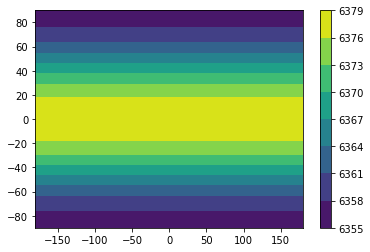

In [14]:
plt.contourf(Lon, Lat, R)
plt.colorbar()

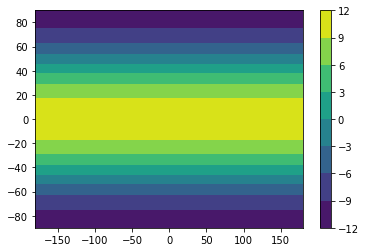

In [15]:
plt.contourf(Lon, Lat, R - R.mean())
plt.colorbar()

In [16]:
import cartopy.crs as ccrs


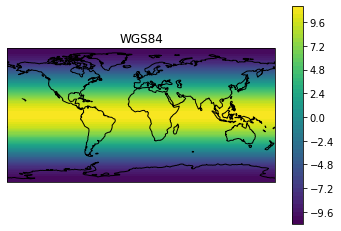

In [22]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(Lon, Lat, R - R.mean(), 60,
             transform=ccrs.PlateCarree())

ax.coastlines()
plt.title(earth_surface.ellipsoid)
plt.colorbar()
plt.show()

In [37]:
def get_R(ellipsoid):
    es = EarthLocation.from_geodetic(Lon, Lat, ellipsoid=ellipsoid)
    return es, np.sqrt(es.x **2 + es.y**2 + es.z**2).to('km')
    
def plot_ellipse_var(ellipsoid):
    
    es, R = get_R(ellipsoid)
    
    ax = plt.axes(projection=ccrs.PlateCarree())

    plt.contourf(Lon, Lat, R - R.mean(), 60,
                 transform=ccrs.PlateCarree())

    ax.coastlines()   
    ax.set_title(es.ellipsoid)
    plt.colorbar(ax=ax)    
    plt.show()

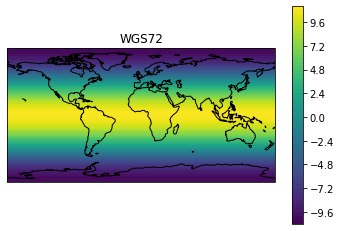

In [38]:
plot_ellipse_var('WGS84')

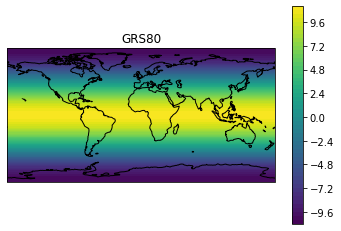

In [39]:
plot_ellipse_var('GRS80')

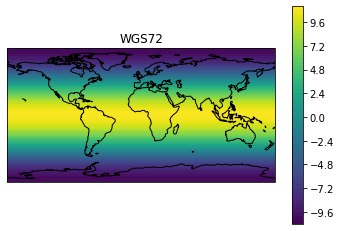

In [40]:
plot_ellipse_var('WGS72')

In [41]:
es1, R1 = get_R('WGS72')
es2, R2 = get_R('WGS84')
es3, R3 = get_R('GRS80')


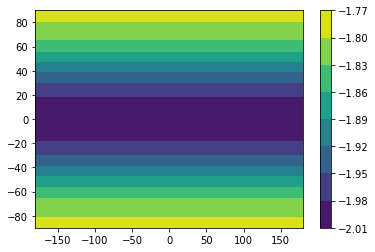

In [44]:
plt.contourf(Lon, Lat, (R1 - R2).to('m'))
plt.colorbar()

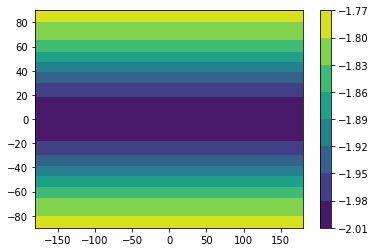

In [48]:
plt.contourf(Lon, Lat, (R1 - R3).to('m'))
plt.colorbar()

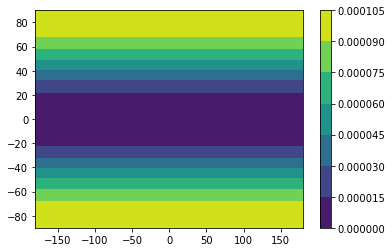

In [46]:
plt.contourf(Lon, Lat, (R2 - R3).to('m'))
plt.colorbar()